In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_completeness_v_measure, davies_bouldin_score
from clustergram import Clustergram
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# <center>ДЗ 9. Clustering+dimension reduction</center>

In [2]:
df = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')
# df.to_csv('SouthGermanCredit.csv', index=False)
pd.set_option('display.max_columns', None)
df = df.drop(['kredit'], axis=1) # удалю таргет из датасета
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,2,1,1
7,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,2,1,2
9,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,2,1,2


In [3]:
print(df.shape)
print(df.info())

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
dtypes: int64(20)
memory usage: 156.4 KB
None


In [4]:
df.describe().round(2)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2.58,20.90,2.54,2.83,3271.25,2.10,3.38,2.97,2.68,1.14,2.84,2.36,35.54,2.68,1.93,1.41,2.90,1.84,1.40,1.96
std,1.26,12.06,1.08,2.74,2822.75,1.58,1.21,1.12,0.71,0.48,1.10,1.05,11.35,0.71,0.53,0.58,0.65,0.36,0.49,0.19
min,1.00,4.00,0.00,0.00,250.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,12.00,2.00,1.00,1365.50,1.00,3.00,2.00,2.00,1.00,2.00,1.00,27.00,3.00,2.00,1.00,3.00,2.00,1.00,2.00
50%,2.00,18.00,2.00,2.00,2319.50,1.00,3.00,3.00,3.00,1.00,3.00,2.00,33.00,3.00,2.00,1.00,3.00,2.00,1.00,2.00
75%,4.00,24.00,4.00,3.00,3972.25,3.00,5.00,4.00,3.00,1.00,4.00,3.00,42.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00
max,4.00,72.00,4.00,10.00,18424.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,75.00,3.00,3.00,4.00,4.00,2.00,2.00,2.00


### Случай без масштабирования

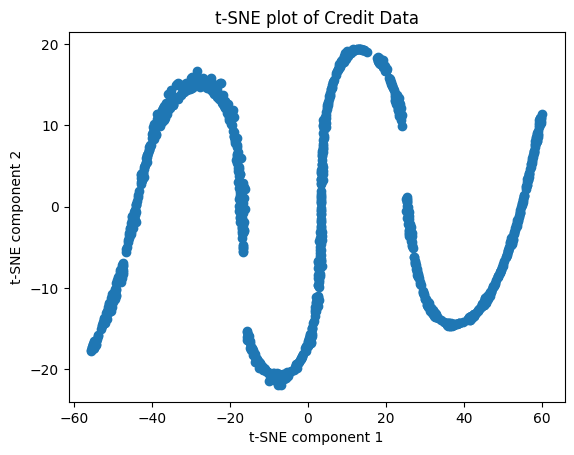

In [5]:
tsne = TSNE(n_components=2, random_state=66)
X_tsne = tsne.fit_transform(df)

plt.scatter(X_tsne[:,0], X_tsne[:,1]);
plt.title('t-SNE plot of Credit Data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

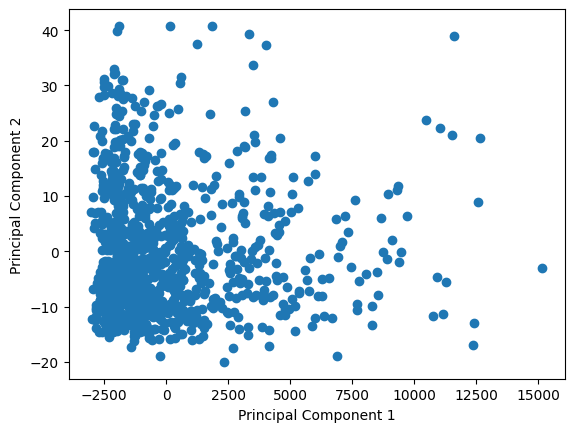

In [6]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(df)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.0431063175201416 seconds.
K=3 fitted in 0.07000017166137695 seconds.
K=4 fitted in 0.06418967247009277 seconds.
K=5 fitted in 0.05990338325500488 seconds.


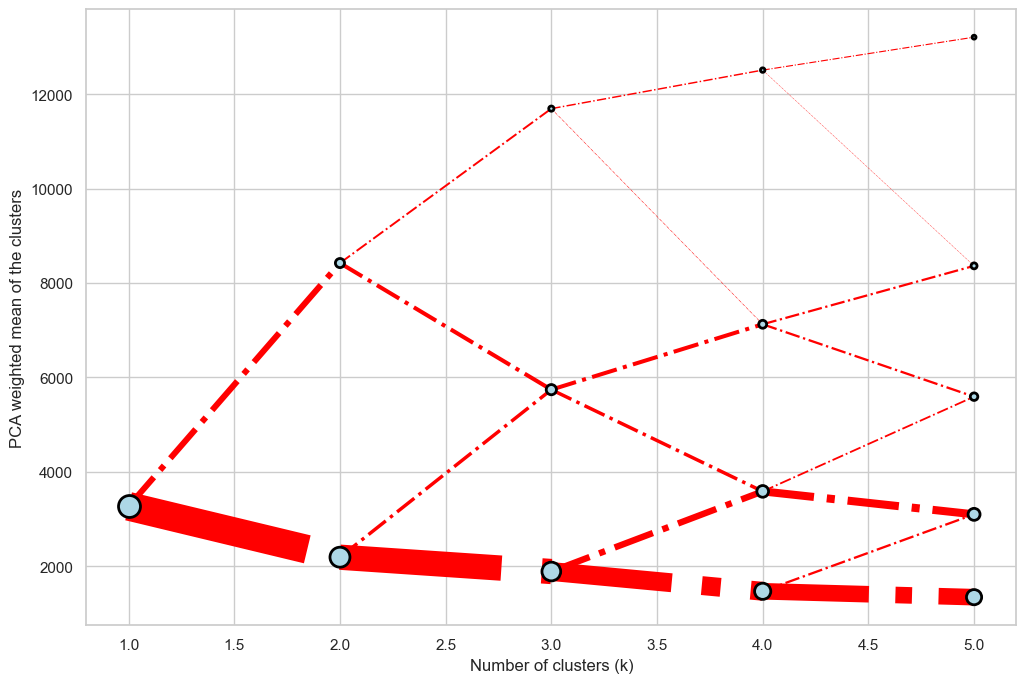

In [7]:
cgram = Clustergram(range(1, 6), n_init=10);
cgram.fit(df);
sns.set(style='whitegrid')

cgram.plot(
    size=0.5,
    linewidth=0.5,
    cluster_style={"color": "lightblue", "edgecolor": "black"},
    line_style={"color": "red", "linestyle": "-."},
    figsize=(12, 8)
);

### Случай с масштабированием

In [8]:
scaler = StandardScaler()
# пробовал разные скалеры
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()
# scaler = PowerTransformer()
# scaler = QuantileTransformer()
# scaler = Normalizer()
X = scaler.fit_transform(df)

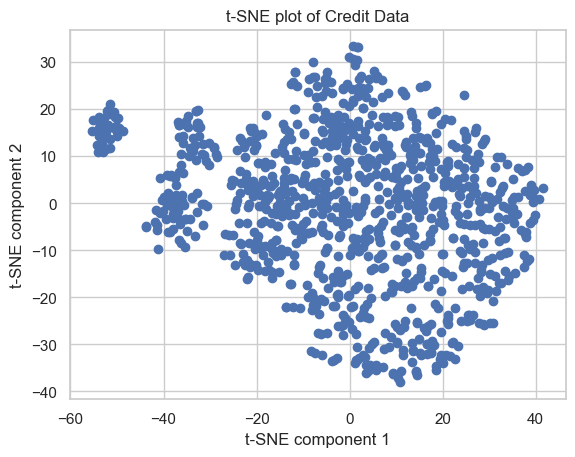

In [9]:
tsne_s = TSNE(n_components=2, random_state=66)
X_tsne_s = tsne_s.fit_transform(X)

plt.scatter(X_tsne_s[:,0], X_tsne_s[:,1]);
plt.title('t-SNE plot of Credit Data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

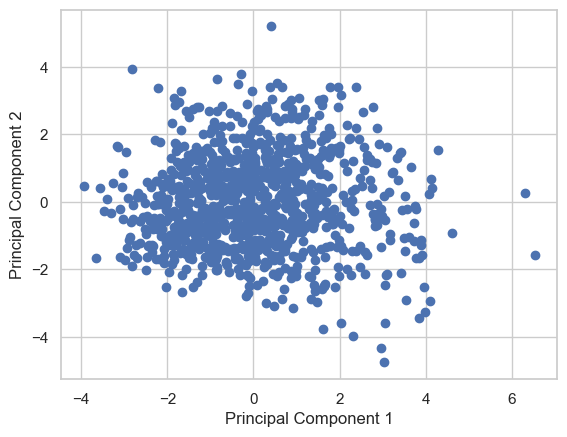

In [10]:
pca_s = PCA(n_components=2)

X_pca_s = pca_s.fit_transform(X)

plt.scatter(X_pca_s[:,0], X_pca_s[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.05243325233459473 seconds.
K=3 fitted in 0.06618380546569824 seconds.
K=4 fitted in 0.14255285263061523 seconds.
K=5 fitted in 0.1349787712097168 seconds.


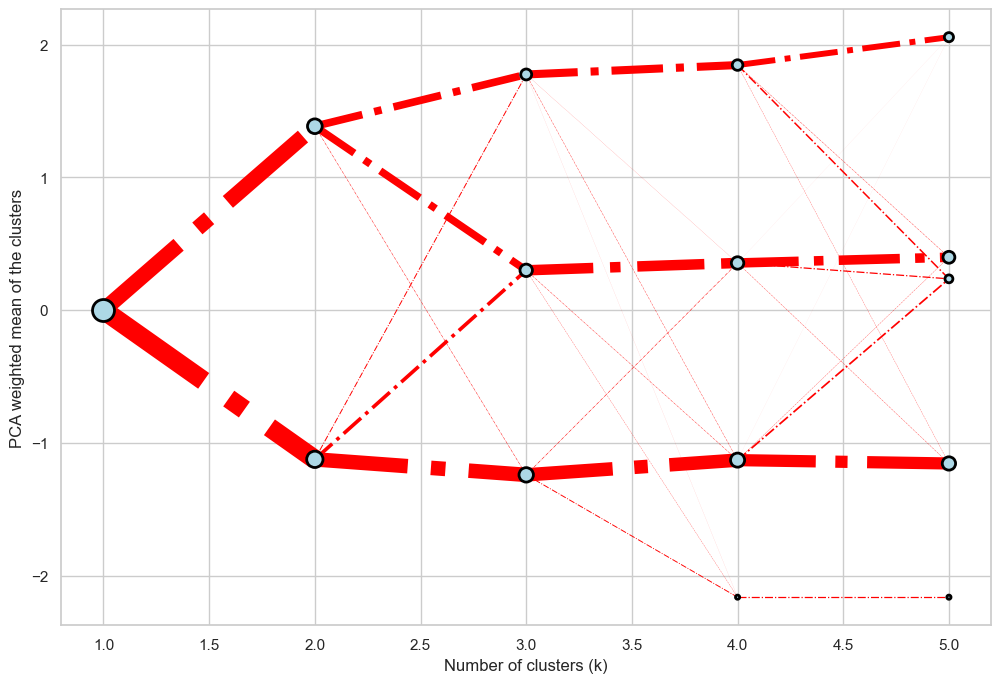

In [11]:
cgram = Clustergram(range(1, 6), n_init=10);
cgram.fit(X);
sns.set(style='whitegrid')

cgram.plot(
    size=0.5,
    linewidth=0.5,
    cluster_style={"color": "lightblue", "edgecolor": "black"},
    line_style={"color": "red", "linestyle": "-."},
    figsize=(12, 8)
);

_Результат после масштабирования менее многообещающий. Оставлю данные без изменений в масштабе. Если получу неудовлетворительный результат - попробую отмасштабированные данные_

_По первым графикам видно, что решить задачу кластеризации можно без добавления новых фичей. Также вернусь к этому вопросу в случае неудовлетворительного результата_

_Два разных метода визуализации подсказывают, что оптимальное количество кластеров - 3, проверю это:_

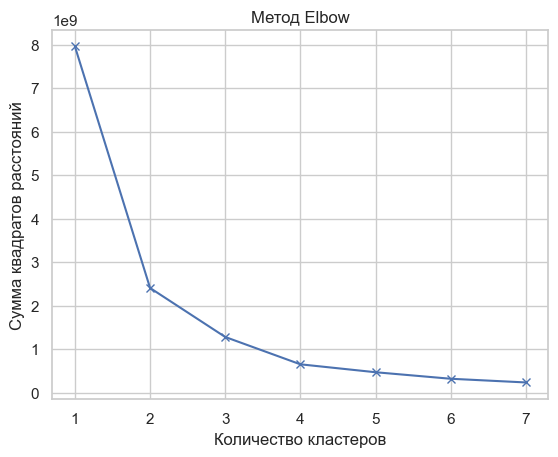

In [12]:
sse = []
k_values = range(1, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод Elbow')
plt.show()

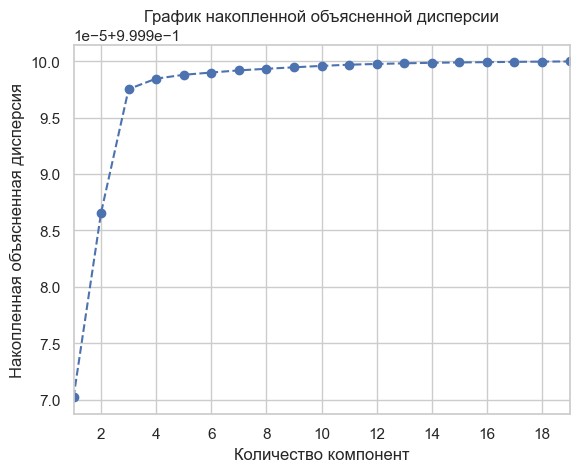

In [13]:
pca_v = PCA(n_components=19)
X_pca_v = pca_v.fit_transform(df)

explained_variance_ratio = pca_v.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(np.arange(1, 20), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('График накопленной объясненной дисперсии')
plt.xlim([1, 19])
plt.show()

При двух компонентах мы теряем ~15% информации, при 3-х - 2-3%

In [14]:
X = df

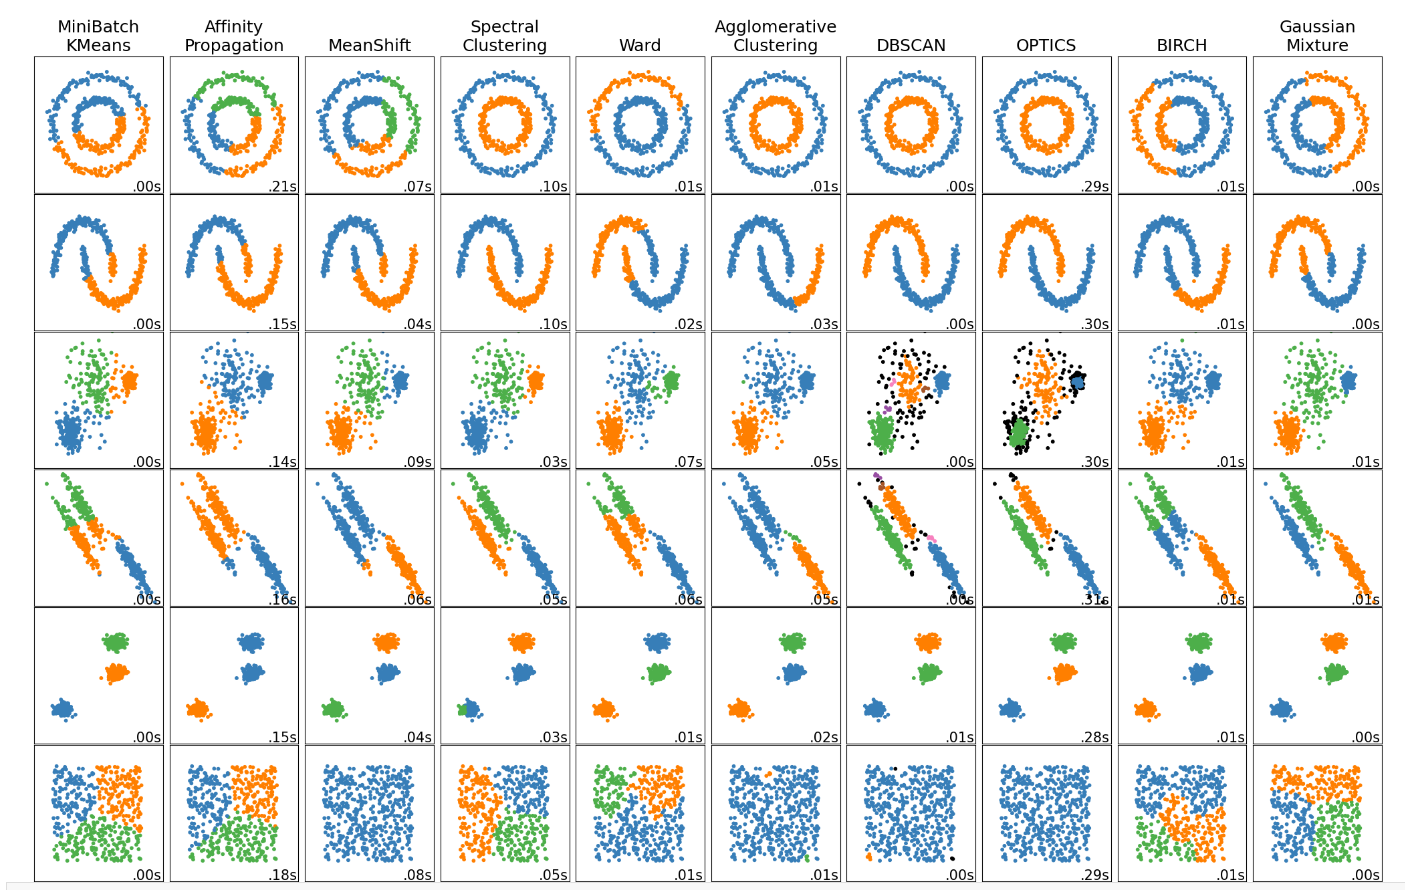

_Попробую методы KMeans, DBSCAN, OPTICS, Spectral Clustering_

**Далее буду выводить результаты сразу с подбором гиперпараметров**

### KMeans

In [15]:
k = 3  # Количество кластеров
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, tol=1e-8, random_state=66, algorithm='lloyd')
kmeans.fit(X)
labels = kmeans.labels_

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.6478558590708904
Calinski-Harabasz Index: 2605.918879431316
Davies-Bouldin Index: 0.5167605863766217


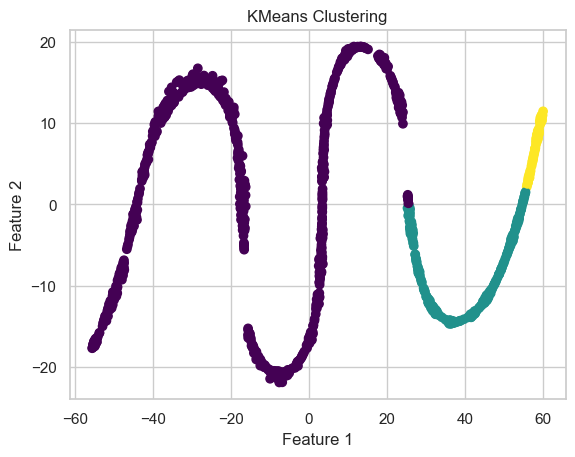

In [16]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

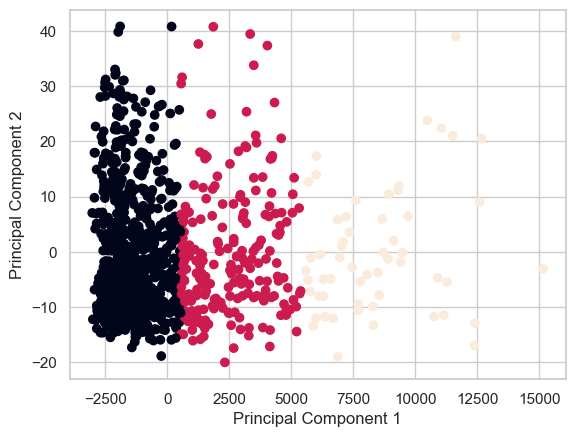

In [17]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### DBSCAN

_Для DBSCAN нужно определить оптимальные n_neighbors и eps. Попробую определить их графически_

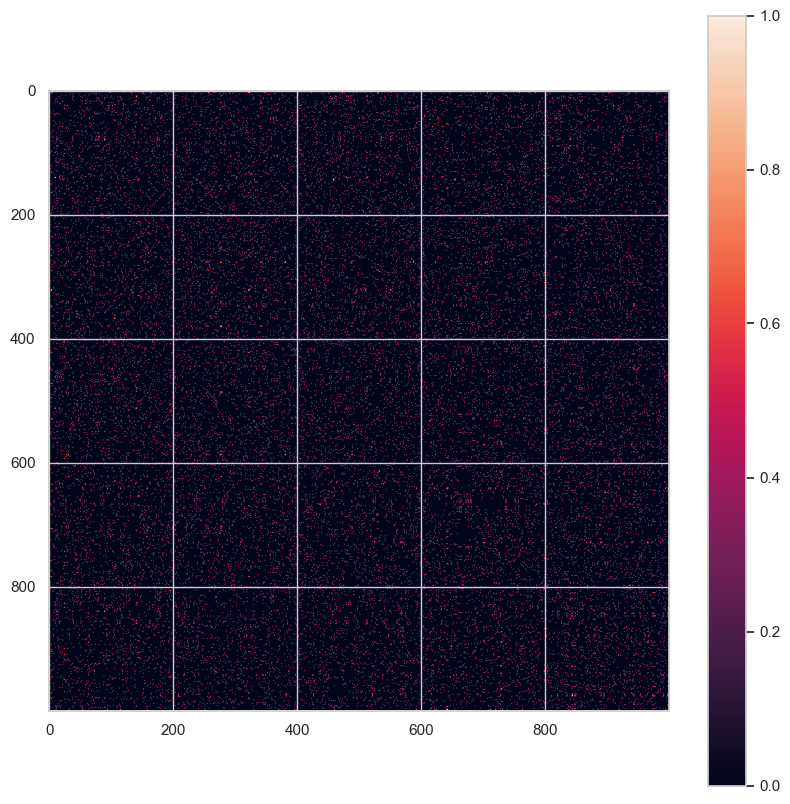

In [18]:
# для оценки n_neighbors
n_neighbors = 30
graph = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity')
plt.figure(figsize=(10, 10))
plt.imshow(graph.toarray())
plt.colorbar()
plt.show()

Этот график является визуализацией матрицы смежности, где каждая ячейка матрицы представляет связь между двумя точками в вашем наборе данных.

Цвет пикселя соответствует значению ячейки матрицы смежности. Чем светлее цвет, тем больше значение ячейки, что указывает на сильную связь между соответствующими точками. Наоборот, чем темнее цвет, тем меньше значение ячейки, что указывает на слабую или отсутствующую связь.

На этом графике я вижу низкую плотность, много шума, отсутствие четких границ кластеров. Возможно, решение не добавлять новые фичи было ошибочным. 

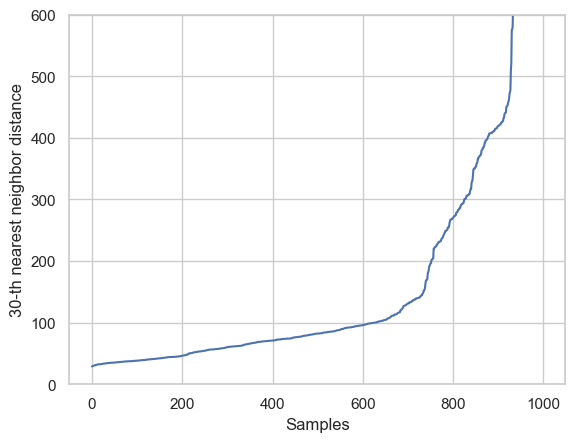

In [19]:
# для оценки eps
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)

avg_distances = distances[:, -1]
sorted_distances = np.sort(avg_distances)

plt.plot(range(len(sorted_distances)), sorted_distances)
plt.xlabel("Samples")
plt.ylabel(f"{n_neighbors}-th nearest neighbor distance")
plt.ylim([0, 600])
plt.show()

In [20]:
dbscan = DBSCAN(eps=96, min_samples=n_neighbors)
labels = dbscan.fit_predict(X)

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.3006744454674556
Calinski-Harabasz Index: 343.57122337252036
Davies-Bouldin Index: 0.7645496053333306


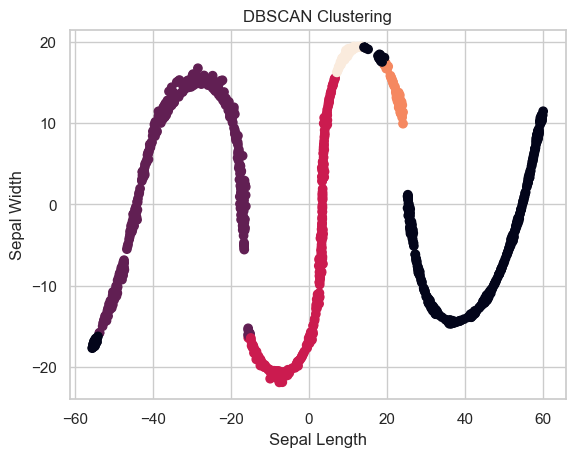

In [21]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering')
plt.show()

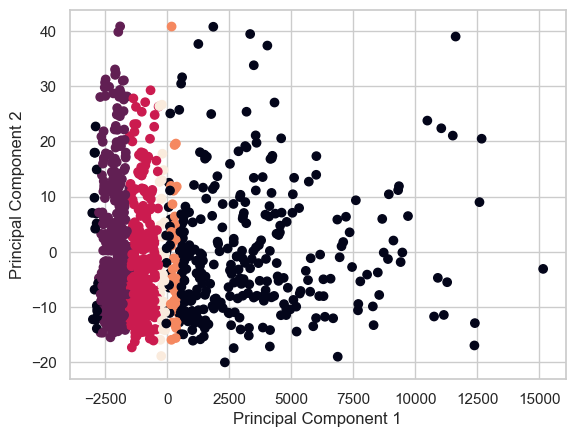

In [22]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

DBSCAN работает куда хуже ожидаемого даже с подбором гиперпараметров. Вероятно сказывается "проклятье размерности"

### OPTICS

In [23]:
optics = OPTICS(min_samples=30, metric='cityblock', xi=0.05, min_cluster_size=0.1)
optics.fit(X)
labels = optics.labels_

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.2665812686750878
Calinski-Harabasz Index: 386.01018963761595
Davies-Bouldin Index: 0.765955479029361


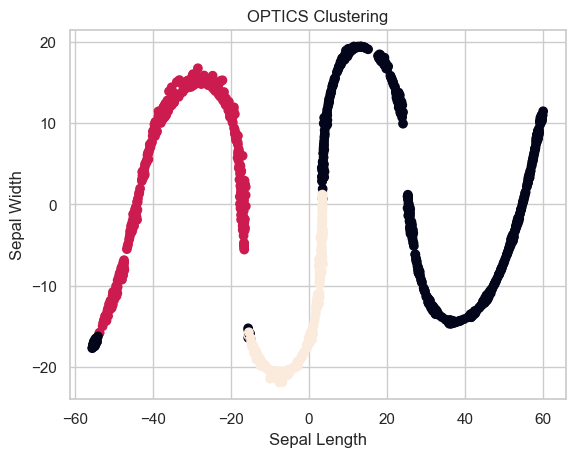

In [24]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('OPTICS Clustering')
plt.show()

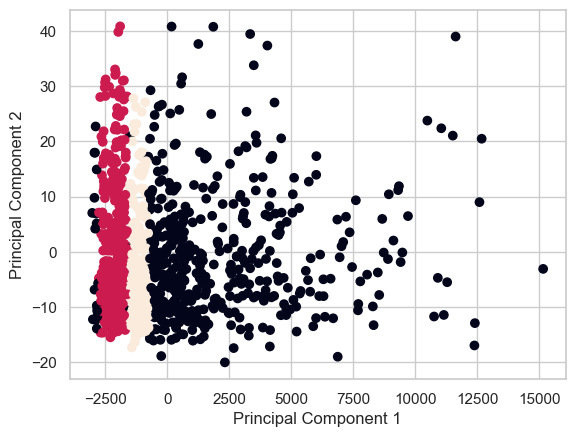

In [25]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### SpectralClustering

In [26]:
spectral_clustering = SpectralClustering(n_clusters=3, random_state=66, assign_labels='discretize', affinity='nearest_neighbors', n_neighbors=13)
labels = spectral_clustering.fit_predict(X)

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.4715649147124335
Calinski-Harabasz Index: 1076.09865151037
Davies-Bouldin Index: 0.6040063600365246


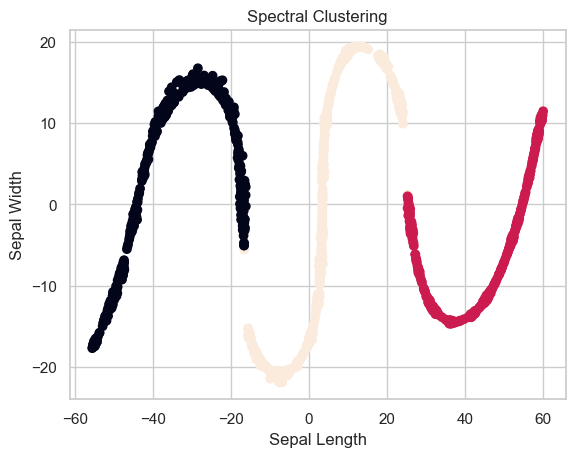

In [27]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Spectral Clustering')
plt.show()

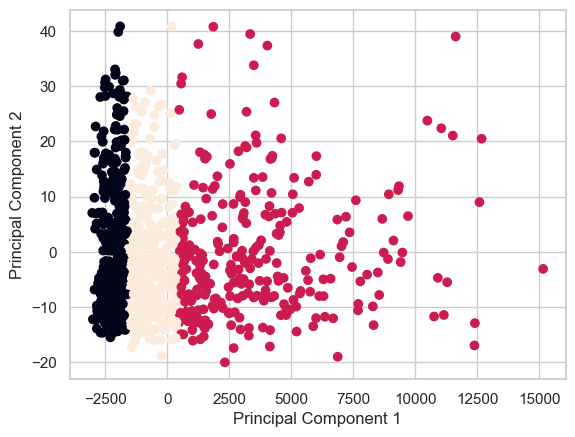

In [28]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

SpectralClustering показал себя лучше всех

Посмотрю на график с тремя компонентами

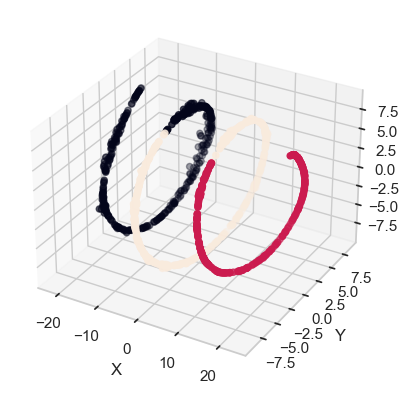

In [29]:
tsne = TSNE(n_components=3, random_state=66)
X_tsne = tsne.fit_transform(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Посмотрю на потери информации при двух компонентах (должно быть ~15% потерь)

In [30]:
pca = PCA(n_components=2)
X = pca.fit_transform(df)

In [31]:
spectral_clustering = SpectralClustering(n_clusters=3, random_state=66, assign_labels='discretize', affinity='nearest_neighbors', n_neighbors=13)
labels = spectral_clustering.fit_predict(X)

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)# 

Silhouette Score: 0.4717780429903484
Calinski-Harabasz Index: 1071.2169013179234
Davies-Bouldin Index: 0.6042128825943063


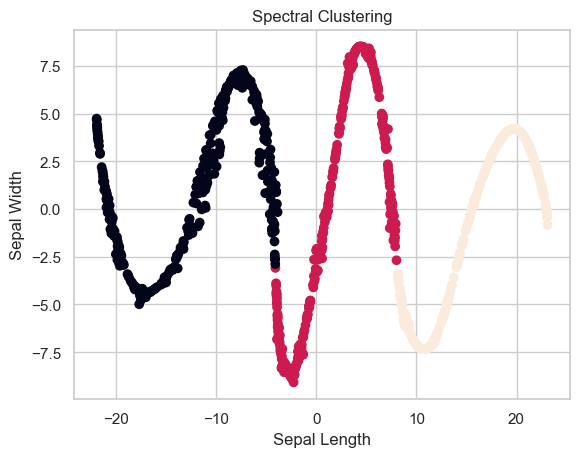

In [32]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Spectral Clustering')
plt.show()

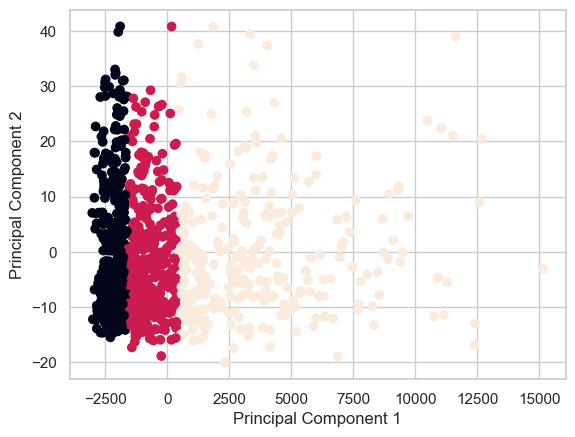

In [33]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
k = 3  # Количество кластеров
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, tol=1e-8, random_state=66, algorithm='lloyd')
kmeans.fit(X)
labels = kmeans.labels_

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", dbi)

Silhouette Score: 0.6479265624929024
Calinski-Harabasz Index: 2606.130770400513
Davies-Bouldin Index: 0.5167011751025982


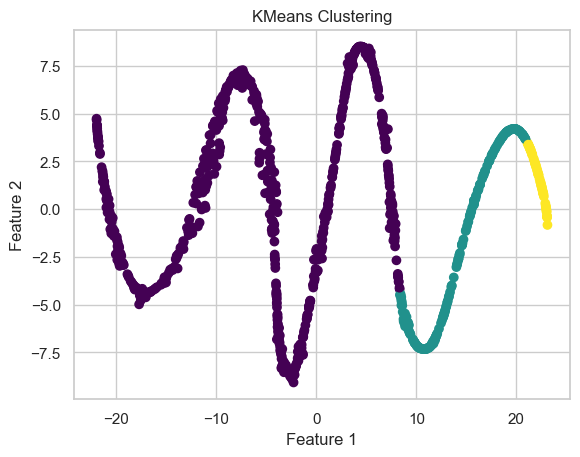

In [35]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

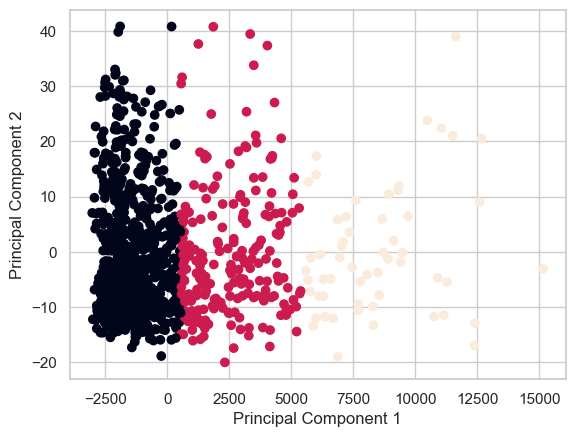

In [36]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()